In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import seaborn as sns

In [5]:
df = pd.read_csv('./cup_loc2.csv', encoding='EUC-KR')

In [8]:
# lat, long만 추출
df2 = df[['lat','long']]

# Kmeans

In [9]:
data_points = df2.values

In [10]:
# Kmeans Clustering 8개로 군집화
kmeans = KMeans(n_clusters=4).fit(data_points)

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 3, 0,
       0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 2, 0, 1, 2, 3], dtype=int32)

In [14]:
# 8개로 군집화된 결과(라벨)를 데이터 프레임에 열로 추가
df2['clust_km'] = kmeans.labels_

<ipython-input-14-c1bfb4e202b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clust_km'] = kmeans.labels_


Text(0.5, 1.0, 'kmeans plot ver2')

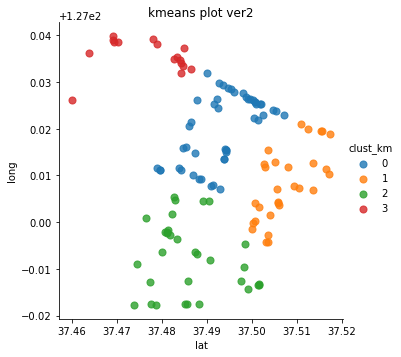

In [15]:
# Data point 시각화
sns.lmplot('lat', 'long', data=df2, fit_reg = False,
          scatter_kws={"s":50}
          ,hue = "clust_km")
plt.title('kmeans plot ver2')

In [18]:
df2

,lat,long,clust_km
0,37.517438,127.018928,1
1,37.515609,127.019459,1
2,37.515450,127.019466,1
3,37.512486,127.020051,1
4,37.507056,127.023017,0
...,...,...,...
120,37.489119,127.004633,2
121,37.491618,127.025263,0
122,37.502692,127.012402,1
123,37.473900,126.982200,2


# DBSCAN

In [19]:
#표준화(평균=0, 분산=1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df2[["lat", "long"]])
scaled_X = scale.transform(df2[["lat", "long"]])

df2["scaled_lat"] = scaled_X[:,0]
df2["scaled_long"] = scaled_X[:,1]

<ipython-input-19-f505de7f3f5f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["scaled_lat"] = scaled_X[:,0]


In [20]:
# DBSCAN 
# eps: 이웃을 정의하기 위한 거리. epsilon.
# min_samples: 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수.
dbscan = DBSCAN(eps=0.5, min_samples=8)
clust_db = dbscan.fit_predict(scaled_X)
df2['clust_db'] = clust_db

Text(0, 0.5, 'long')

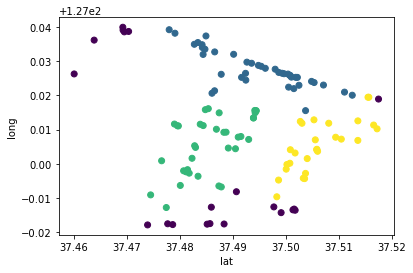

In [21]:
#clustering 결과 확인
plt.scatter(x=df2.lat, y=df2.long, c=df2.clust_db)
plt.xlabel("lat")
plt.ylabel("long")

In [23]:
# df['clust_db'] = df2['clust_db']
df['clust_km'] = df2['clust_km']
df['clust_db'] = df2['clust_db']
df

,loc,lat,long,type,loc2,clust_km,clust_db
0,강남대로 623 연세미소치과의원,37.517438,127.018928,CB,NaN,1,-1
1,신사역 4번출구 횡단보도,37.515609,127.019459,CB,subway,1,2
2,신사역 4번 출구 버스정류장,37.515450,127.019466,CB,bus,1,2
3,강남대로 567 대도식당,37.512486,127.020051,CB,NaN,1,0
4,강남대로 505 고도일병원,37.507056,127.023017,CB,NaN,0,0
...,...,...,...,...,...,...,...
120,명달로 134 버스정류장,37.489119,127.004633,CB,bus,2,1
121,사임당로 143 버스정류장,37.491618,127.025263,CB,bus,0,0
122,반포구립도서관 앞 버스정류장,37.502692,127.012402,CB,bus,1,2
123,방배우성아파트 버스정류장,37.473900,126.982200,CB,bus,2,-1
